**Eloi Vilella:** 

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 2 (PART 2)
# Network percolation

---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to `practical9_name1_name2.ipynb`, where `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aul@-ESCI***.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

In this session we will study the percolation transition in random networks. To that end we will use the Python package `NetworkX`.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

First, use the **NetworkX** function `erdos_renyi_graph` to generate an Erdös-Renyi random network with $n=10000$ nodes and connection probability $p=0.0005$. Plot the degree distribution.

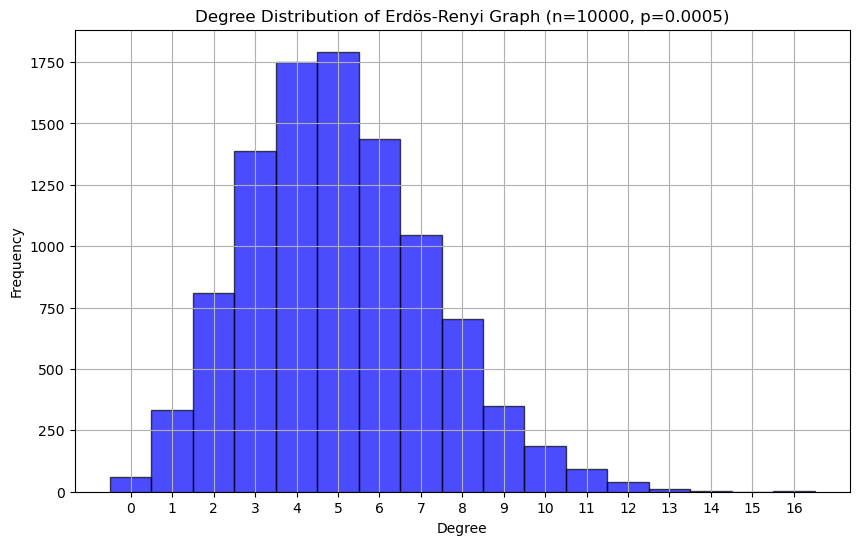

In [2]:
network = nx.erdos_renyi_graph(n=10000, p=0.0005)
degrees = [degree for _, degree in network.degree()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=np.arange(min(degrees), max(degrees) + 2) - 0.5, 
         color='blue', edgecolor='black', alpha=0.7)
plt.title("Degree Distribution of Erdös-Renyi Graph (n=10000, p=0.0005)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.xticks(np.arange(min(degrees), max(degrees) + 1, step=1))
plt.show()


---

We generate an Erdös-Renyi random graph with 10,000 nodes and an edge probability of 0.0005. After calculating the degree of each node, we plot the degree distribution in a histogram, adjusting the bins and x-axis ticks for enhanced clarity and precision.

---

Verify that the degree distribution obtained above matches a Poisson distribution with mean equal to the average degree of the network.

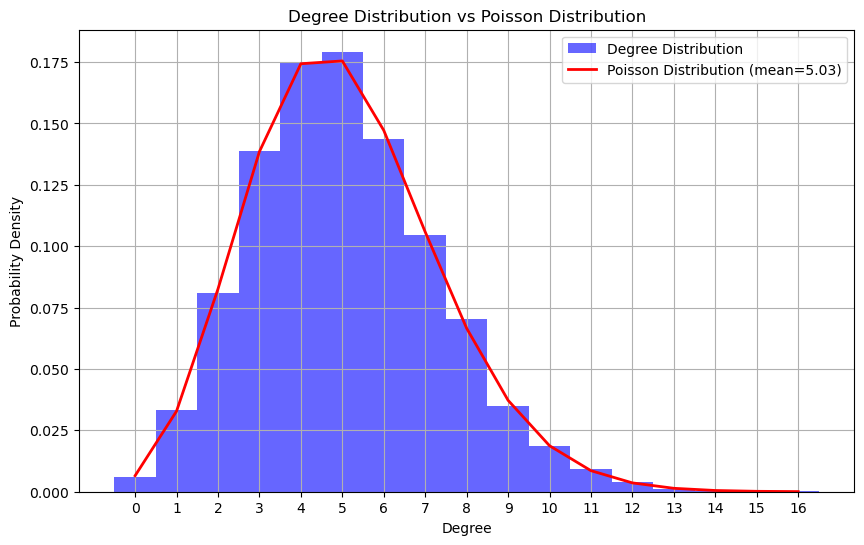

In [3]:
average_degree = np.mean(degrees)
poisson_distribution = poisson.pmf(np.arange(max(degrees) + 1), mu=average_degree)

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=np.arange(min(degrees), max(degrees) + 2) - 0.5, 
         density=True, alpha=0.6, color='blue', label='Degree Distribution')
plt.plot(np.arange(max(degrees) + 1), poisson_distribution, 'r-', lw=2, 
         label=f'Poisson Distribution (mean={average_degree:.2f})')
plt.title("Degree Distribution vs Poisson Distribution")
plt.xlabel("Degree")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(degrees), max(degrees) + 1, step=1))
plt.show()

We will now study the percolation transition discussed in class. To that end, generate an ensemble of Erdös-Renyi networks (e.g. 100 networks) with 1000 nodes each. Compute for each network the fraction of nodes that belong to the largest connected component, and calculate its average over the ensemble of networks with a given connection probability $p$. Repeat this calculation for a range of values of $p$ between $0$ and $10/n$, with $n$ being the number of nodes of the network.

In [ ]:
n = 1000
p_values = np.linspace(0, 10 / n, 50)
ensemble_size = 100
average_fractions = []

for p in p_values:
    fractions = []
    
    for _ in range(ensemble_size):
        network = nx.erdos_renyi_graph(n, p)
        largest_component = max(nx.connected_components(network), key=len)
        fraction = len(largest_component) / n
        fractions.append(fraction)
    
    average_fractions.append(np.mean(fractions))


Finally, plot the transition curve.

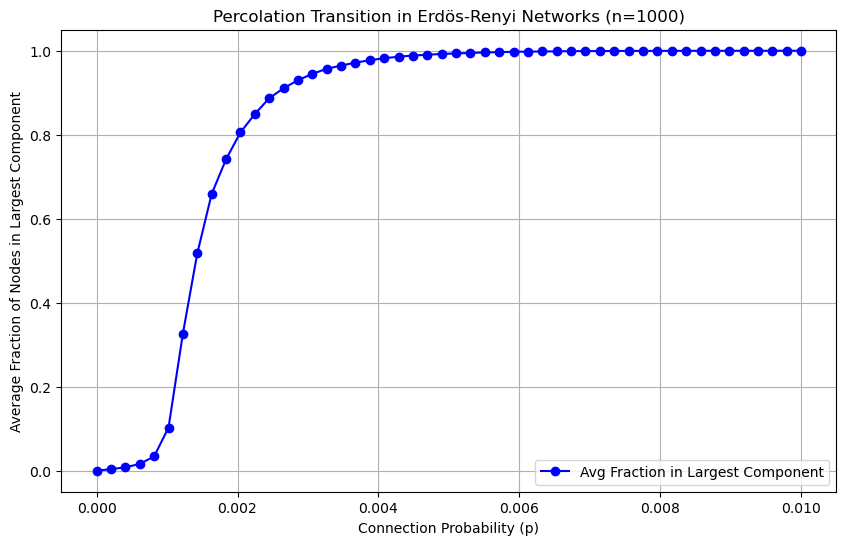

In [5]:

plt.figure(figsize=(10, 6))
plt.plot(p_values, average_fractions, 'o-', color='blue', label='Avg Fraction in Largest Component')
plt.title("Percolation Transition in Erdös-Renyi Networks (n=1000)")
plt.xlabel("Connection Probability (p)")
plt.ylabel("Average Fraction of Nodes in Largest Component")
plt.grid(True)
plt.legend()
plt.show()

---

We generate an ensemble of 100 Erdös-Renyi networks with 1000 nodes each to study the percolation transition. For each network, we calculate the fraction of nodes that belong to the largest connected component and average these fractions over the ensemble for a range of connection probabilities p between 0 and 10/n. Finally, we plot the results to illustrate the relationship between the connection probability and the average fraction of nodes in the largest component.

---